<a href="https://colab.research.google.com/github/matheusfolly/MVP_An-lise_de_Dados/blob/main/MVP_V_Final_Matheus_de_Almeida_Folly_Ribeiro_BTC_ETH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Análise de Dados e Boas Práticas**

## Tema: Bitcoin e Ether: Uma Análise Temporal dos Últimos 5 Anos

## Aluno: Matheus Folly



# 1. Definição do Problema

* **Descrição do problema:**


O conjunto de dados selecionado abrange os valores diários de preço e volume de negociação das criptomoedas Bitcoin e Ether no período de 14/11/2018 a 14/11/2023. Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/zsinghrahulk/crypto-currency-bitcoin-and-ethereum-data/data

Este projeto visa analisar as flutuações temporais dessas criptomoedas, realizar comparações entre elas e investigar a correlação existente. O propósito é conduzir um estudo abrangente sobre o comportamento desses ativos ao longo dos últimos 5 anos, explorando suas características individuais e examinando a influência que uma exerce sobre a outra.

* **Hipóteses sobre o problema:**


1. Observações históricas sugerem que as criptomoedas atingiram seus valores máximos durante o ano de 2021.

2. O ano de 2022 foi marcado por quedas nos preços das criptomoedas de forma geral.

3. Considerando a posição proeminente do Bitcoin no mercado, a suposição é que o volume de negociação do Bitcoin é significativamente maior do que o do Ether.

3. Tanto o Bitcoin quanto o Ether devem apresentar grandes flutuações nos preços ao longo do tempo.

4. Existe uma correlação positiva entre Bitcoin e Ether, tanto no preço quanto no volume de negociação.


* **Restrições para a seleção dos dados:**

Para garantir a qualidade e relevância das análises realizadas, foram estabelecidas diversas restrições e condições na seleção dos dados. Busquei por conjuntos de dados com registros diários, abrangendo um período extenso de mais de dois anos, visando uma análise mais abrangente. Optei por conjuntos atualizados regularmente para refletir com maior precisão as condições de mercado atuais. Priorizei fontes confiáveis, como este dataset extraído do Yahoo Finance e disponibilizado no Kaggle, a fim de assegurar a credibilidade dos dados utilizados. Além disso, busquei por conjuntos de dados que não apresentassem muitos valores nulos, visando evitar possíveis limitações na análise.

* **Atributos do dataset**


1. Date : Representa o dia específico para o qual os dados foram registrados.

2. Open : Indica o preço inicial da criptomoeda no início do período de negociação no dia.

3. High : Refere-se ao preço mais alto alcançado pela criptomoeda durante o dia.

4. Low : Indica o preço mais baixo atingido pela criptomoeda durante o dia.

5. Close : Refere-se ao preço final da criptomoeda no final do período de negociação no dia.

6. Adj Close : Representa o preço de fechamento do dia ajustado para considerar eventos como pagamentos de dividendos ou outras correções.


# 2. Introdução

O Bitcoin opera como uma moeda digital descentralizada que facilita transações diretas entre usuários, dispensando a necessidade de intermediários como bancos. Reconhecido por sua função como reserva de valor digital e por ser um sistema de pagamento eficiente.

Já o Ethereum transcende a simples definição de criptomoeda, trata-se de uma plataforma que viabiliza a elaboração de contratos inteligentes e aplicativos descentralizados. Enquanto o Ethereum representa a infraestrutura tecnológica que permite a criação de contratos inteligentes e aplicativos descentralizados, o Ether é a unidade digital usada para transações na rede Ethereum.

Resumindo, o **Ethereum é a plataforma blockchain e o Ether é a criptomoeda específica utilizada dentro dessa plataforma**. Neste projeto, vamos analisar os preços e volumes de negociação da criptomoeda Ether, bem como os valores da criptomoeda Bitcoin.


In [ ]:
# Importações

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, HTML

# 3. Carga dos Dados

O dataset foi salvo no github e foi carregado para o colab utilizando o pacote pandas.

In [ ]:
# Url do datset no github
url_df = "https://raw.githubusercontent.com/matheusfolly/MVP_An-lise_de_Dados/main/ETH-BTC-USD.csv"

# Carrega e nomeia o dataset que será utilizado
df = pd.read_csv(url_df)

# 4. Análise dos Dados

## 4.1 Estatísticas Descritivas

In [ ]:
# Tamanho do dataset

df.shape

(3654, 8)

In [ ]:
# Primeiras linhas do dataset

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Currency
0,11/14/2018,206.533997,207.044998,174.084000,181.397003,181.397003,2.595330e+09,Etherium
1,11/15/2018,181.899002,184.251007,170.188995,180.806000,180.806000,2.638410e+09,Etherium
2,11/16/2018,180.865005,181.350006,173.126007,175.177002,175.177002,2.015330e+09,Etherium
3,11/17/2018,175.360001,175.850998,172.869003,174.001007,174.001007,1.832800e+09,Etherium
4,11/18/2018,174.175003,179.151993,174.175003,177.067001,177.067001,1.810920e+09,Etherium


Como utilizarei apenas os dados de Adj Close e Volume para análise, excluí as outras colunas.

In [ ]:
# Criação de uma cópia do dataset para preservar as informações originais.

df2 = df.copy()

In [ ]:
# Exclusão de colunas que não serão utilizadas

colunas_excluir = ['Open','High','Low','Close']

df2.drop(columns=colunas_excluir, inplace=True)

In [ ]:
# Primeiras linhas da cópia criada com ajustes

df2.head()

,Date,Adj Close,Volume,Currency
0,11/14/2018,181.397003,2.595330e+09,Etherium
1,11/15/2018,180.806000,2.638410e+09,Etherium
2,11/16/2018,175.177002,2.015330e+09,Etherium
3,11/17/2018,174.001007,1.832800e+09,Etherium
4,11/18/2018,177.067001,1.810920e+09,Etherium


Identifiquei uma imprecisão no conjunto de dados, onde a moeda 'Ether' foi indevidamente referida como 'Etherium'. Conforme explicado na introdução, o ativo ETH está relacionado à criptomoeda Ether, não à plataforma Ethereum. O ajuste é feito na próxima linha de código.

In [ ]:
# Correção

df2['Currency'] = df2['Currency'].replace('Etherium', 'Ether')

In [ ]:
#Primeiras 5 linhas do dataset após a correção

df2.head()

,Date,Adj Close,Volume,Currency
0,11/14/2018,181.397003,2.595330e+09,Ether
1,11/15/2018,180.806000,2.638410e+09,Ether
2,11/16/2018,175.177002,2.015330e+09,Ether
3,11/17/2018,174.001007,1.832800e+09,Ether
4,11/18/2018,177.067001,1.810920e+09,Ether


In [ ]:
# Tipos dos dados

df2.dtypes

Date          object
Adj Close    float64
Volume       float64
Currency      object
dtype: object

É importante observar que a coluna 'Date' foi inicialmente reconhecida como tipo 'object'. Na linha de código subsequente, irei transformá-la para o tipo 'datetime' para facilitar manipulações temporais.


In [ ]:
# Transformção para o tipo datetime

df2['Date'] = pd.to_datetime(df2['Date'])

In [ ]:
# Tipos dos dados após alteração

df2.dtypes

Date         datetime64[ns]
Adj Close           float64
Volume              float64
Currency             object
dtype: object

Não há valores faltantes no dataset

In [ ]:
# Valores nulos

df2.isnull().sum()

Date         0
Adj Close    0
Volume       0
Currency     0
dtype: int64

Para aprimorar a análise, irei dividir o conjunto de dados com base na coluna "Currency", que é a coluna que identifica cada criptomoeda.

In [ ]:
# Criando dois DataFrames separados com base na coluna 'Currency'
df_bitcoin = df2[df2['Currency'] == 'Bitcoin']
df_ether = df2[df2['Currency'] == 'Ether']

In [ ]:
#Exibindo os dataFrames criados

display(df_bitcoin.head())
display(df_ether.head())

,Date,Adj Close,Volume,Currency
1827,2018-11-14,5738.350098,7.398940e+09,Bitcoin
1828,2018-11-15,5648.029785,7.032140e+09,Bitcoin
1829,2018-11-16,5575.549805,5.279320e+09,Bitcoin
1830,2018-11-17,5554.330078,4.303150e+09,Bitcoin
1831,2018-11-18,5623.540039,4.159680e+09,Bitcoin


,Date,Adj Close,Volume,Currency
0,2018-11-14,181.397003,2.595330e+09,Ether
1,2018-11-15,180.806000,2.638410e+09,Ether
2,2018-11-16,175.177002,2.015330e+09,Ether
3,2018-11-17,174.001007,1.832800e+09,Ether
4,2018-11-18,177.067001,1.810920e+09,Ether


In [ ]:
# Exibindo os describes dos dataframes com seus respectivos títulos estilizados
display(HTML('<h2 style="color:#1f77b4">Bitcoin</h2>'))
display(df_bitcoin.describe())

display(HTML('<h2 style="color:#ff7f0e">Ether</h2>'))
display(df_ether.describe())

,Adj Close,Volume
count,1827.000000,1.827000e+03
mean,23638.874727,2.860180e+10
std,16162.762804,1.846298e+10
min,3236.761719,3.551764e+09
25%,9347.447265,1.653157e+10
50%,20599.537110,2.549315e+10
75%,34656.041015,3.616346e+10
max,67566.828130,3.509680e+11


,Adj Close,Volume
count,1827.000000,1.827000e+03
mean,1355.722281,1.405166e+10
std,1176.332366,1.012389e+10
min,84.308296,1.496177e+09
25%,219.294296,6.858724e+09
50%,1320.549194,1.157646e+10
75%,1902.627380,1.836774e+10
max,4812.087402,8.448291e+10


**Análise dos Resumos Estatísticos:**

* A grande diferença entre os valores mínimo e máximo da coluna 'Adj Close'
indica uma considerável volatilidade nos preços ao longo do tempo. Isso sugere flutuações significativas nos preços dessas criptomoedas.

* O intervalo entre o menor e o maior volume de transações também é amplo, indicando variações significativas na atividade de negociação.

* O desvio padrão das duas variáveis ('Adj Close' e 'Volume') é relativamente alto em relação à média, indicando uma dispersão considerável dos valores em torno das médias, o que reforça a ideia de alta volatilidade e variação nos dados.

* A diferença entre o terceiro quartil e o valor máximo dos dados sugere a presença de alguns pontos fora do padrão em ambas as variáveis ('Adj Close' e 'Volume'). Isso poderia representar eventos extremos ou situações atípicas.

## 4.2 Distribuição de Valores

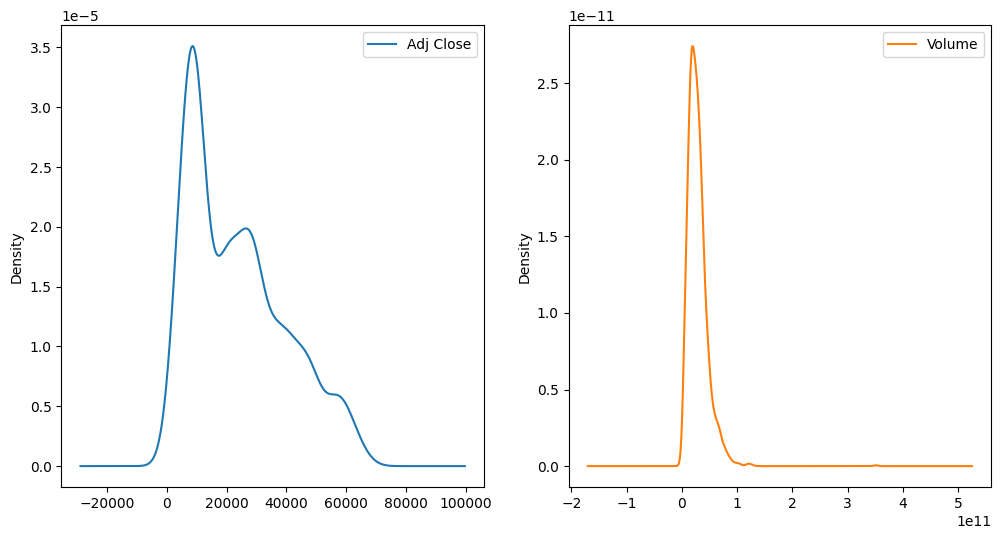

In [ ]:
# Gráfico de densidade para cada coluna do DataFrame Bitcoin

display(HTML('<h2 style="color:#1f77b4">Bitcoin</h2>'))
df_bitcoin[['Adj Close', 'Volume']].plot(kind='density', subplots=True, layout=(1, 2), sharex=False, figsize=(12, 6))
plt.show()

**Bitcoin**

* **Preço de fechamento ajustado (Adj Close):**

A observação do pico mais expressivo entre 0 e 20.000 revela uma concentração notável de valores nesse intervalo, indicando uma ocorrência considerável de dias em que os preços de fechamento se situaram nessa faixa específica. Além disso, a presença de um segundo pico, embora menos destacado, em torno de 30.000, aponta para outra faixa relevante de valores. A progressiva redução na densidade à medida que os valores se elevam sugere que à medida que os preços de fechamento se tornam mais altos, sua ocorrência é menos frequente.

* **Volume:**

O gráfico de densidade para o volume de negociação evidencia um único pico entre os valores de 0 e 1e11 (ou 100 bilhões). Essa representação sugere uma concentração significativa de transações dentro desse intervalo de volume. A ausência de múltiplos picos ressalta uma estabilidade consistente ao longo do período analisado.

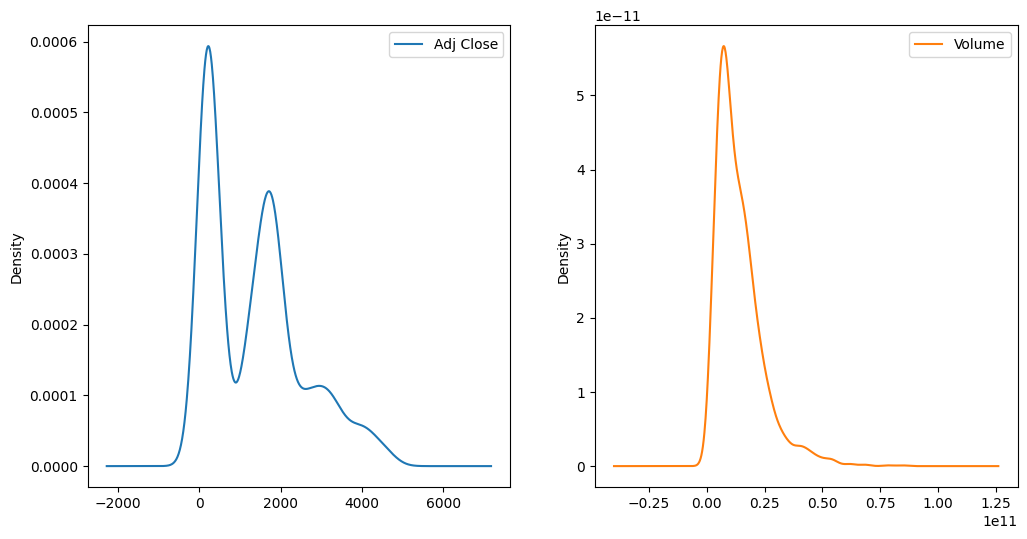

In [ ]:
# Gráfico de densidade para cada coluna do DataFrame Ether

display(HTML('<h2 style="color:#ff7f0e">Ether</h2>'))
df_ether[['Adj Close', 'Volume']].plot(kind='density', subplots=True, layout=(1, 2), sharex=False, figsize=(12, 6))
plt.show()

**Ether**

* **Preço de fechamento ajustado (Adj Close):**

A análise de densidade revela uma marcante concentração de valores, evidenciada pelo proeminente pico entre valores de 0 a 10.000. Este padrão sugere uma frequência significativa de períodos em que o Ether foi negociado neste intervalo de preço. Além disso, a presença de um segundo pico, situado entre 10.000 e aproximadamente 20.000, aponta para uma faixa de valores intermediários frequentes, possivelmente refletindo um aumento consistente no preço da criptomoeda dentro desse intervalo. Entretanto, à medida que os preços ultrapassam essa faixa intermediária, a densidade gradativamente diminui, indicando uma menor frequência de valores mais altos.



* **Volume:**

O gráfico de densidade para o volume de negociação do Ether mostra um padrão com um único pico entre os valores de 0 e 30 bilhões. Esse padrão de um único pico sugere que a maior parte do volume de negociação ocorreu dentro dessa faixa específica. A concentração expressiva nesse intervalo indica uma consistência considerável na quantidade de transações realizadas nessa faixa de volume.


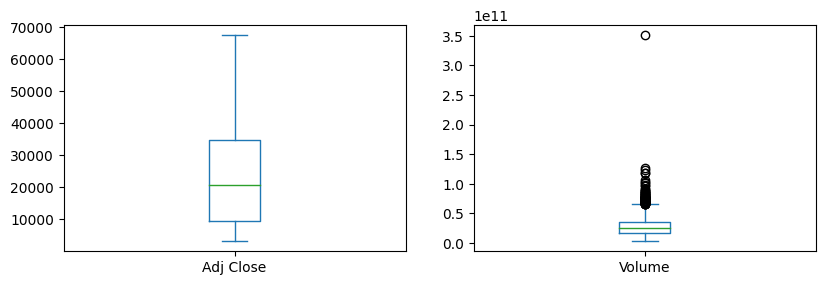

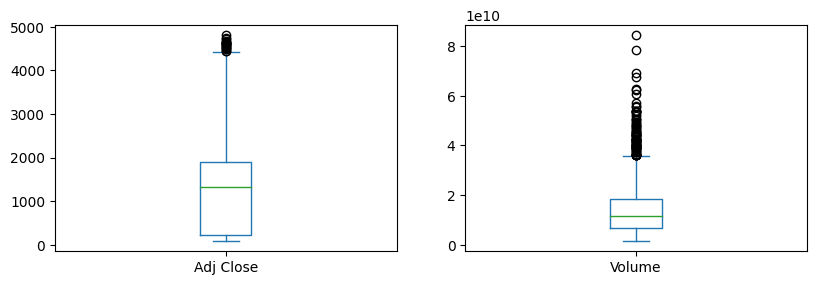

In [ ]:
# Boxplot para cada DataFrame

display(HTML('<h2 style="color:#1f77b4">Bitcoin</h2>'))
df_bitcoin.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

display(HTML('<h2 style="color:#ff7f0e">Ether</h2>'))
df_ether.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Conforme mencionado anteriormente na análise dos resumos estatísticos, há um amplo intervalo entre o terceiro quartil e os valores máximos de cada conjunto de dados. Esses pontos atípicos provavelmente representam cenários não usuais no histórico de preços dessas criptomoedas, o que será investigado mais detalhadamente em fases posteriores do projeto.

# 5. Pré-processamento de Dados

### Normalização

A normalização dos dados foi uma etapa fundamental para facilitar uma análise justa entre os valores de Bitcoin e Ether. Ambas as criptomoedas apresentam características únicas e é comum observar diferenças expressivas nos valores de preço de fechamento e volume de negociações entre elas.

Ao normalizar esses conjuntos de dados, o objetivo foi eliminar as disparidades de escala entre as variáveis das criptomoedas analisadas e tornar possível a análise entre volume de negociações e preço de fechamento, que por natureza, possuem escalas diferentes.


In [ ]:
# Criando cópias dos dataframes originais
df_bitcoin_norm = df_bitcoin.copy()
df_ether_norm = df_ether.copy()

# Aplicando a normalização nos novos dataframes
scaler_bitcoin = MinMaxScaler()
df_bitcoin_norm[['Adj Close', 'Volume']] = scaler_bitcoin.fit_transform(df_bitcoin[['Adj Close', 'Volume']])

scaler_ether = MinMaxScaler()
df_ether_norm[['Adj Close', 'Volume']] = scaler_ether.fit_transform(df_ether[['Adj Close', 'Volume']])

In [ ]:
# Exibindo os DataFrames normalizados

display(df_bitcoin_norm.head())
display(df_ether_norm.head())

,Date,Adj Close,Volume,Currency
1827,2018-11-14,0.038887,0.011074,Bitcoin
1828,2018-11-15,0.037483,0.010018,Bitcoin
1829,2018-11-16,0.036356,0.004973,Bitcoin
1830,2018-11-17,0.036026,0.002163,Bitcoin
1831,2018-11-18,0.037102,0.001750,Bitcoin


,Date,Adj Close,Volume,Currency
0,2018-11-14,0.020536,0.013245,Ether
1,2018-11-15,0.020411,0.013764,Ether
2,2018-11-16,0.019220,0.006256,Ether
3,2018-11-17,0.018971,0.004056,Ether
4,2018-11-18,0.019620,0.003793,Ether


# 6. Análise do dataset

### 6.1 Variação Temporal: Preço x Volume (Valores normalizados)

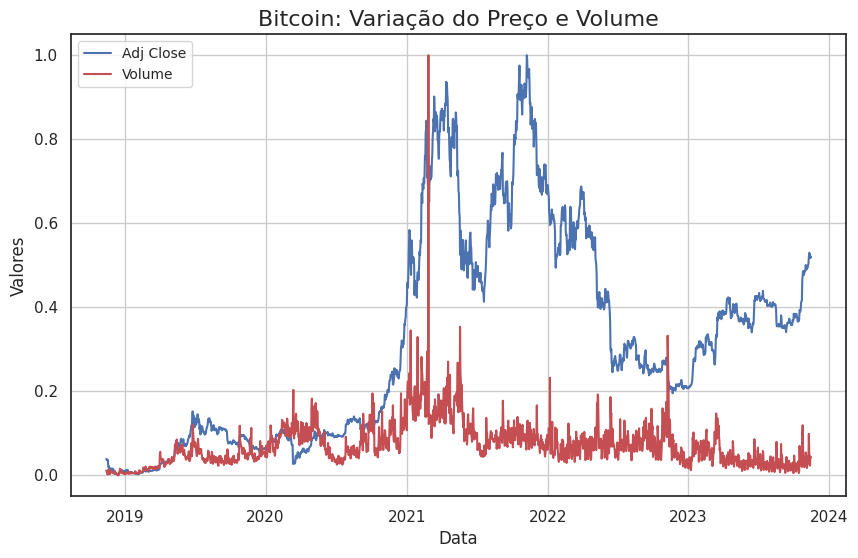

In [ ]:
# Configurando o estilo seaborn
sns.set(style="white")

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando o gráfico de linhas para 'Adj Close' e 'Volume'
sns.lineplot(x='Date', y='Adj Close', data=df_bitcoin_norm, label='Adj Close')
sns.lineplot(x='Date', y='Volume', data=df_bitcoin_norm, color='r', label='Volume')

# Adicionando detalhes ao gráfico
plt.title('Bitcoin: Variação do Preço e Volume', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.legend(loc='upper left', fontsize=10)

# Adicionando grade ao gráfico
plt.grid(True)

# Mostrando o gráfico
plt.show()

Em 2021, observamos não apenas uma alta significativa no volume de negociação, mas também dois momentos marcantes de pico no preço de fechamento.
Esses picos no preço podem ser atribuídos a diferentes fatores. Primeiro, a crescente adoção institucional do Bitcoin como reserva de valor contribuiu para um aumento substancial na demanda. Empresas renomadas, como Tesla e Square, investiram em Bitcoin, elevando sua legitimidade e atratividade como ativo de investimento. Além disso, a crescente conscientização do público sobre criptomoedas e a sua aceitação em diferentes setores impulsionaram o interesse. A decisão de El Salvador de adotar o Bitcoin como moeda de curso legal também teve impacto, gerando expectativas positivas para a adoção global da criptomoeda.

Entretanto, o ano de 2022 trouxe uma queda acentuada no mercado de criptomoedas, conhecida como "inverno cripto". Essa queda nos preços, especialmente do Bitcoin, foi influenciada por vários fatores, como preocupações regulatórias em diferentes países, medidas de bancos centrais para controlar a inflação e eventos geopolíticos, como o conflito entre Rússia e Ucrânia. Além disso, a falência de empresas proeminentes no setor cripto contribuiu para incertezas e reduziu a confiança dos investidores. Esses eventos combinados afetaram a demanda e geraram um declínio significativo nos preços das criptomoedas.


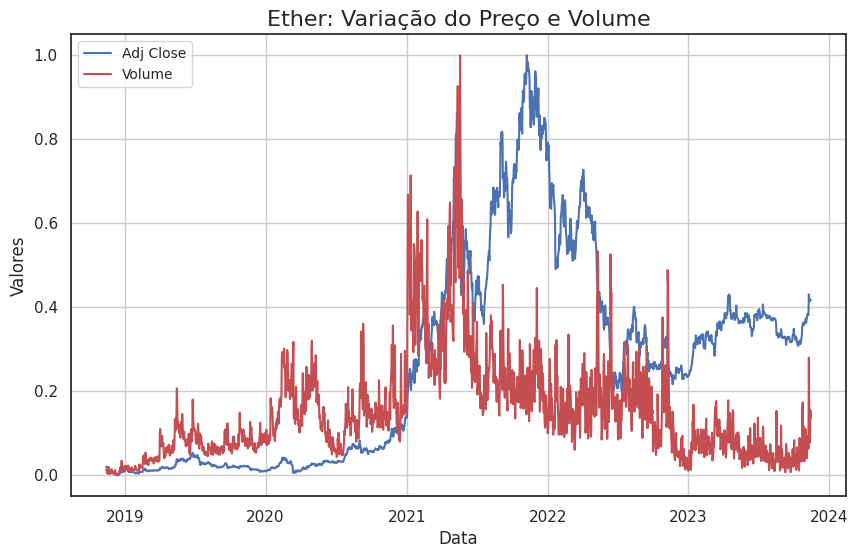

In [ ]:
# Configurando o estilo seaborn
sns.set(style="white")

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando o gráfico de linhas para 'Adj Close' e 'Volume' no mesmo eixo
sns.lineplot(x='Date', y='Adj Close', data=df_ether_norm, label='Adj Close')
sns.lineplot(x='Date', y='Volume', data=df_ether_norm, color='r', label='Volume')

# Adicionando detalhes ao gráfico
plt.title('Ether: Variação do Preço e Volume', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.legend(loc='upper left', fontsize=10)

# Adicionando grade ao gráfico
plt.grid(True)

# Mostrando o gráfico
plt.show()

Assim como no gráfico do Bitcoin, o Ether também experimentou um padrão semelhante. Registrando dois consideráveis picos de preço e volume de negociação em 2021, seguidos por uma queda substancial em 2022.

Em 2021, o Ether experimentou um crescimento notável em seu valor, impulsionado por uma combinação de fatores. A ascensão da adoção de aplicativos descentralizados e contratos inteligentes na rede Ethereum, juntamente com a expansão significativa no setor de finanças descentralizadas e o estouro das NFTs (Tokens Não Fungíveis), contribuíram para uma demanda em ascensão pelo Ether.

No entanto, em 2022, o Ether enfrentou uma queda substancial. Questões relacionadas à escalabilidade e eficiência da rede Ethereum, especialmente diante de problemas de congestionamento e altas taxas de transação, geraram preocupações entre investidores. Esses desafios técnicos levantaram incertezas sobre a capacidade do Ether de lidar com uma demanda crescente, impactando seu desempenho no mercado.

As mesmas razões que foram apontadas anteriormente para explicar as altas e baixas da Bitcoin também exerceram influência significativa sobre o Ether, uma vez que impactam o mercado de criptomoedas como um todo. Devido ao status da Bitcoin como a maior criptomoeda, suas flutuações costumam influenciar todo o mercado.


### 6.2 Volatilidade Diária

 O cálculo de volatilidade é feito pelo desvio padrão dos retornos diários. Então eu calculei a variação percentual diária com o método ".pctchange()" e depois calculei o desvio padrão desses retornos diários com o método ".std()".

In [ ]:
# Calculando os retornos diários a partir dos valores monetários
retorno_bitcoin = df_bitcoin['Adj Close'].pct_change()
retorno_ether = df_ether['Adj Close'].pct_change()

# Calculando a volatilidade a partir dos retornos
volatilidade_bitcoin = retorno_bitcoin.std() * 100
volatilidade_ether = retorno_ether.std() * 100

# Para melhorar a legibilidade da frase, enfatizar o nome da moeda e sua variável de volatilidade, acrescentei no código cores e negrito
print(f'\033[1mA volatilidade do preço diário do \033[0m\033[1;34mBitcoin\033[0m\033[1m é: \033[0m\033[1;34m{volatilidade_bitcoin:.2f}%\033[0m')
print(f'\033[1mA volatilidade do preço diário do \033[0m\033[1;38;5;208mEther\033[0m\033[1m é: \033[0m\033[1;38;5;208m{volatilidade_ether:.2f}%\033[0m')

A volatilidade do preço diário do Bitcoin é: 3.57%
A volatilidade do preço diário do Ether é: 4.58%


A volatilidade diária dos preços é uma medida crucial nos mercados financeiros para entender a flutuação dos ativos. No caso do Bitcoin, a volatilidade diária atinge cerca de 3.57%, representando a variação percentual média nos preços ao longo de um dia. Já para o Ether, essa medida é um pouco maior, em torno de 4.58%, indicando uma maior variabilidade nos preços diários. Esses números ressaltam a natureza dinâmica das criptomoedas, mostrando que, mesmo em um curto intervalo de tempo, os valores podem sofrer alterações significativas. A volatilidade impacta diretamente as possibilidades de ganhos e perdas dos investimentos. Em geral, ela está relacionada ao risco e é diretamente proporcional a ele.

### 6.3 Comparação: Bitcoin x Ether


*   Comparação de Preço (Valores normalizados)

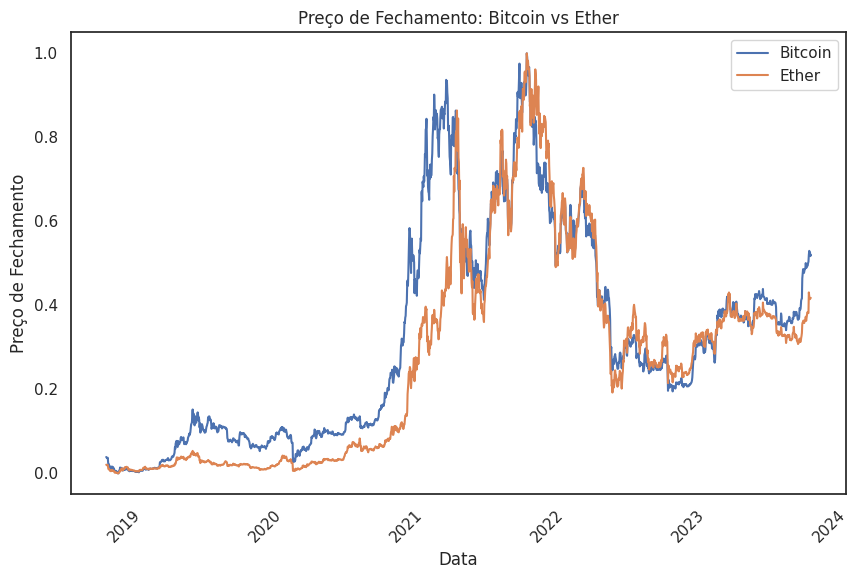

In [ ]:
# Criando o gráfico
plt.figure(figsize=(10, 6))

# Gráfico para o Bitcoin
plt.plot(df_bitcoin_norm['Date'], df_bitcoin_norm['Adj Close'], label='Bitcoin')

# Gráfico para o Ether
plt.plot(df_ether_norm['Date'], df_ether_norm['Adj Close'], label='Ether')

plt.xlabel('Data')  # Rótulo do eixo x
plt.ylabel('Preço de Fechamento')  # Rótulo do eixo y
plt.title('Preço de Fechamento: Bitcoin vs Ether')  # Título do gráfico
plt.legend()  # Legenda
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização

plt.show()  # Mostra o gráfico

O gráfico de linhas destaca uma semelhança marcante entre essas criptomoedas. Eles apresentam padrões de variação muito semelhantes ao longo do tempo, mantendo uma proximidade notável em seus valores de fechamento. Essa similaridade nos movimentos sugere uma forte correlação entre o Bitcoin e o Ether quanto aos seus preços de fechamento. Quando um deles flutua, o outro tende a seguir um padrão comparável, indicando uma notável interdependência em seus movimentos de preço.


*   Comparação de Volume (Valores normalizados)

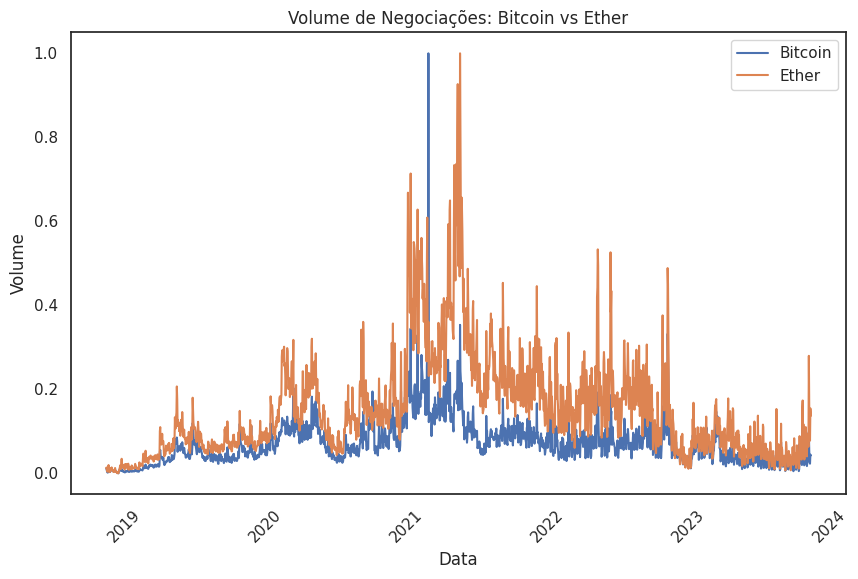

In [ ]:
# Criando o gráfico
plt.figure(figsize=(10, 6))

# Trace o gráfico para o Bitcoin
plt.plot(df_bitcoin_norm['Date'], df_bitcoin_norm['Volume'], label='Bitcoin')

# Trace o gráfico para o Ether
plt.plot(df_ether_norm['Date'], df_ether_norm['Volume'], label='Ether')

plt.xlabel('Data')  # Rótulo do eixo x
plt.ylabel('Volume')  # Rótulo do eixo y
plt.title('Volume de Negociações: Bitcoin vs Ether')  # Título do gráfico
plt.legend()  # Legenda
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização

plt.show()  # Mostra o gráfico

O gráfico de volumes de negociação do Bitcoin e Ether oferece perspectivas interessantes sobre o mercado de criptomoedas. Ambas as moedas mantêm um registro consistente de suas negociações ao longo do tempo.

Contudo, destaca-se a notável diferença na volatilidade de negociações entre o Ether e Bitcoin. Embora o Bitcoin mantenha consistentemente um volume de negociação superior, ao analisar os dados normalizados, percebe-se uma peculiaridade: os valores normalizados do Ether aparecem maiores. Isso ocorre porque a normalização permite comparar variações proporcionais entre diferentes conjuntos de dados. Essa diferença mostra que, o Ether teve flutuações proporcionais mais acentuadas em comparação com o Bitcoin.

Essa notável volatilidade do Ether em seus volumes de negociação, sugere uma sensibilidade maior a eventos ou mudanças específicas do mercado, mesmo com um volume de negociação inferior ao do Bitcoin.

### 6.4 Correlação

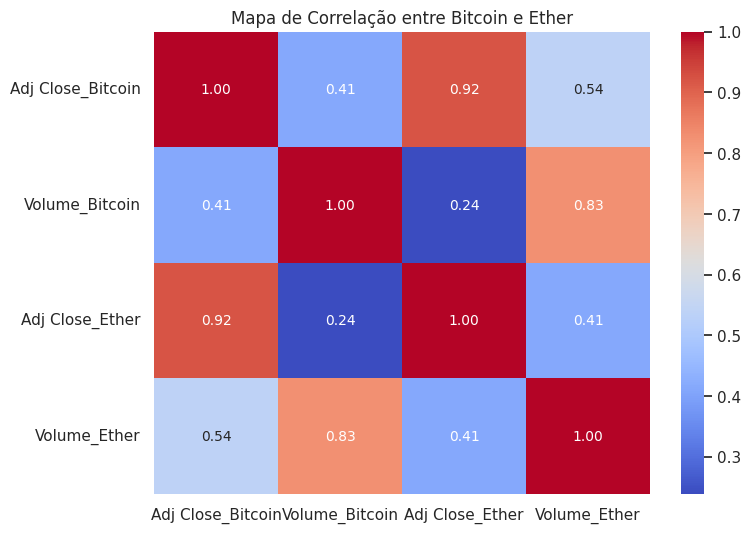

In [ ]:
# Correlação utilizando os valores originais do dataset

# Combinando os dois conjuntos de dados em um único usando a coluna 'Data'
dados_combinados = pd.merge(df_bitcoin, df_ether, on='Date', suffixes=('_Bitcoin', '_Ether'))

# Selecionando apenas as colunas relevantes para o mapa de correlação
colunas_relevantes = ['Adj Close_Bitcoin', 'Volume_Bitcoin', 'Adj Close_Ether', 'Volume_Ether']
dados_correlacao = dados_combinados[colunas_relevantes]

# Matriz de correlação
matriz_correlacao = dados_correlacao.corr()

# Mapa de calor para visualizar a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Mapa de Correlação entre Bitcoin e Ether')
plt.show()

O mapa de correlação revela uma forte ligação entre Bitcoin e Ether no mercado de criptomoedas. Com um notável coeficiente de correlação positiva de 0,92 nos preços de fechamento, essas moedas digitais tendem a se movimentar em conjunto. Quando o preço do Bitcoin sobe ou desce, o Ether tende a seguir o mesmo padrão, mostrando uma relação simétrica marcante.

Além disso, o mapa destaca uma correlação positiva de 0,83 no volume de negociações entre essas criptomoedas. Isso sugere que mudanças significativas no volume de negociações do Bitcoin frequentemente se refletem em movimentos similares no volume de transações do Ether.


# 7. Conclusão

As análises realizadas reforçaram as suposições iniciais. Em 2021, tanto o Bitcoin quanto o Ether alcançaram seus picos históricos de preços, marcando um período de recordes para ambas as criptomoedas. No entanto, o cenário mudou drasticamente no ano seguinte, 2022, com uma queda acentuada nos valores desses ativos, conduzindo o mercado a um período conhecido como "inverno cripto".

Os padrões de flutuação nos preços e volumes de negociação ao longo do tempo confirmaram as expectativas de grandes oscilações para esses ativos. O Bitcoin manteve um volume de negociação superior. O Ether revelou-se mais sensível às mudanças do mercado, exibindo flutuações proporcionais mais intensas em comparação ao Bitcoin. As criptomoedas são conhecidas por sua extrema volatilidade, influenciada por eventos imprevisíveis, especulações do mercado, falta de regulamentação e liquidez limitada. Essa dinâmica contribui para flutuações significativas nos preços, tornando o mercado das criptomoedas propenso a mudanças imprevisíveis.

A análise de correlação entre o Bitcoin e Ether destacou uma interdependência notável entre eles. Ambos demonstraram uma forte correlação positiva nos preços de fechamento e nos volumes de negociação, indicando uma tendência para movimentos semelhantes. Essa relação pode ser atribuída ao papel predominante do Bitcoin como referência no mercado, influenciando outras criptomoedas, como o Ether. Além disso, a sobreposição nos investimentos e portfólios de criptomoedas, onde o Bitcoin e o Ether frequentemente coexistem, pode fortalecer essa correlação.

No entanto, é importante observar que essa análise se baseia em dados históricos dos últimos cinco anos, ou seja, a correlação foi observada nesse período específico. O cenário pode mudar no futuro, já que a correlação não é estática e pode ser impactada por eventos específicos, mudanças tecnológicas ou variações nas estratégias de investimento.


# 8. Referências

https://br.cointelegraph.com/news/truth-about-crypto-price-correlation-how-closely-does-eth-follow-btc

https://conteudos.xpi.com.br/criptomoedas/bitcoin-mostra-recuperacao-em-outubro-e-valor-de-mercado-volta-ultrapassar-us-1-trilhao/#:~:text=O%20valor%20de%20mercado%20de,recupera%C3%A7%C3%A3o%20do%20criptoativo%20em%20outubro

https://www.infomoney.com.br/onde-investir/bitcoin-faz-dois-anos-em-el-salvador/

https://exame.com/future-of-money/em-queda-livre-bitcoin-tem-salvacao-ate-o-fim-do-ano-especialistas-respondem/

https://www.infomoney.com.br/mercados/bitcoin-de-us-47-mil-a-us-15-mil-relembre-os-fatos-que-fizeram-a-criptomoeda-desabar-em-2022/

https://www.poder360.com.br/economia/bitcoin-cai-54-em-2022-entenda-mudancas-no-mundo-cripto/

https://www.infomoney.com.br/guias/nft-token-nao-fungivel/

https://panoramacrypto.transfero.com/valorizacao-do-ethereum-em-2021-foi-maior-do-que-do-bitcoin/

https://blog.nubank.com.br/volatilidade-criptomoedas/